# IBM Data Science Project Capstone

Name            : Fitrie Ratnasari |
Origin          : Indonesia |
Date            : October 1st, 2020 |
Name of Project : Seattle Collision Severity Case |

## 1. Business Understanding

In early 2020, World Health Organization stated that every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.

Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.

In order to reduce traffic accident in Seatlle, Local Government is going to apply new approach of early-alert system that could prevent accidents. Such an approach takes into account people's vulnerability to injuries in road traffic crashes. The cornerstones of this approach by predicting severity collition type as a result of Clssification of Machine Learning algorithm with condition given such as vehicle speed, weather, road condition, visibility, number of pedestrian and vehicle. 


## 2. Data Understanding 

The data was gathered from the Seattle Department of Transportation (SDOT) Traffic Management Division from 2004 to 2020 in csv format.
It is consist of 37 independent variables and 194,673 rows. The dependent variable which becomes target, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident from 0 to 3, as following :

0: Little to no Probability (Clear Conditions)\
1: Very Low Probability — Chance or Property Damage\
2: Low Probability — Chance of Injury\
2b: Mild Probability — Chance of Serious Injury\
3: High Probability — Chance of Fatality

Particularly in the data given, severity type will only be 1 and 2.

In this section, we'd like to know the trend of collision accident in Seattle, skewness of the dataset, the correlation of each attributes in the data (of which later the most predictable variable of accident will be chosen to train the data) and to know how correlate weather, road condition and visibility combination to collisions, and statistical significant of attributes. 

**a. Trend of Collision in Seattle**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data-Collisions.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(194673, 38)

In [4]:
df['year'] = pd.DatetimeIndex(df['INCDTTM']).year
df.head(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,2013
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2006
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,2004


In [5]:
data =[['2004', 11865],
        ['2005', 15115],
        ['2006', 15188],
        ['2007', 14456],
        ['2008', 13660],
        ['2009', 11734],
        ['2010', 10808],
        ['2011', 10919],
        ['2012', 10907],
        ['2013', 10577],
        ['2014', 11841],
        ['2015', 12995],
        ['2016', 11659],
        ['2017', 10873],
        ['2018', 10419],
        ['2019', 9412],
        ['2020', 2245]]

df_year = pd.DataFrame (data, columns = ['Year','Total Collisions']).set_index('Year')
print (df_year)
  

      Total Collisions
Year                  
2004             11865
2005             15115
2006             15188
2007             14456
2008             13660
2009             11734
2010             10808
2011             10919
2012             10907
2013             10577
2014             11841
2015             12995
2016             11659
2017             10873
2018             10419
2019              9412
2020              2245


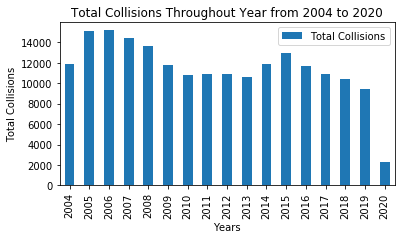

In [70]:
df_year.plot(kind='bar', 
             #alpha=0.25, # 0-1, default value a= 0.5
             stacked=True,
             figsize=(6, 3),
            )

plt.title('Total Collisions Throughout Year from 2004 to 2020')
plt.ylabel('Total Collisions')
plt.xlabel('Years')

plt.show()

From figure above we can say, the trend of collisions accured has been declining from 2005 to 2013, but then rise up in 2014 to 2015 and starting to gradually declining in 2016 to 2019.


**b. Skewness of Dataset**

Another information can be obtained from the data is skewness, which this element takes an important role for accuracy especially in Classification. The data supposed to be balanced before we input the train dataset to classification machine learning algorithm. We need to check whether the data is balance or otherwise. 

In [7]:
severity_count = df['SEVERITYCODE'].value_counts().to_frame()

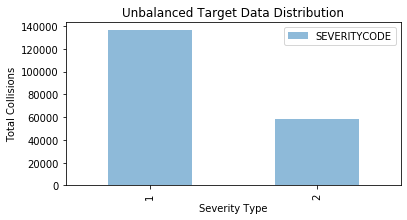

In [8]:
%matplotlib inline
severity_count.plot(kind='bar', 
             alpha=0.5, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(6, 3),
            )

plt.title('Unbalanced Target Data Distribution')
plt.ylabel('Total Collisions')
plt.xlabel('Severity Type')

plt.show()

Now we know the dataset are unbalanced and need rebalancing later in pre-processing.

**c. Correlation Attributes to Target**

Before doing machine learning algorithm, we need to determine the feature or attributes that being most predictable variables to collision as a target.
The most predictable variables choosen in training set, the higher accuracy will be achieved. 

As we know the data types are varied one to another, then currently (before doing any data wrenching) we can only know the correlation between variables in integer type by using Pearson Correlation. 
We'll be doing the preprocessing in the next section to do final assessment on each variable given, including object type. As of now, the correlation of attributes in integer type are in below figure :

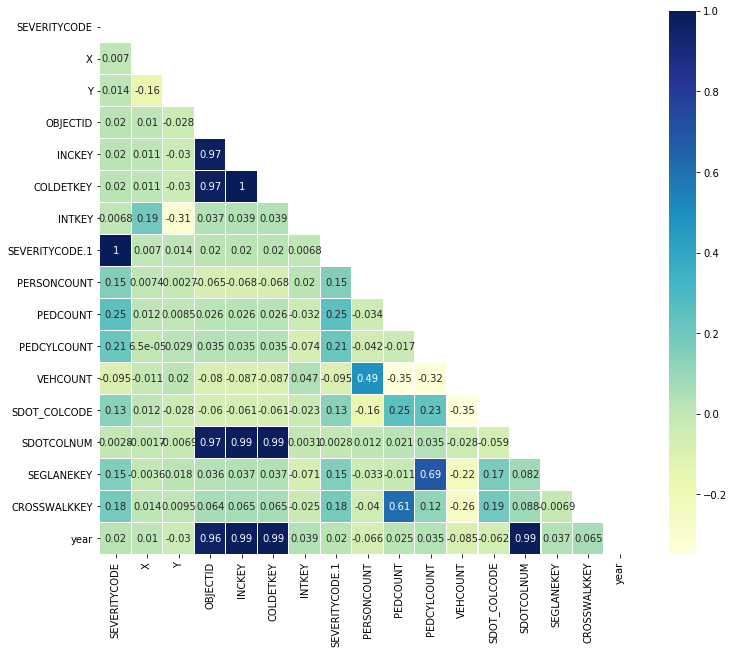

In [9]:
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))

matrix = np.triu(corrmat)
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1, mask=matrix, annot = True)

Take out the 'keys and code' (since it is used for formatting report perusal),  then we have:\
PedCount : The total number of pedestrian in the collision,\
PedcylCount : The number of bicycles involved in the collision,\
as most **predictable variable to collision type**.

Next we will see how correlate other variables in object type to severity collision.

In [10]:
df_gptest1 = df[['LIGHTCOND','WEATHER','SEVERITYCODE']]
grouped_test1 = df_gptest1.groupby(['LIGHTCOND','WEATHER'],as_index= False).mean()
grouped_pivot = grouped_test1.pivot(index='LIGHTCOND',columns='WEATHER')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

SEVERITYCODE                                     \
WEATHER                  Blowing Sand/Dirt     Clear Fog/Smog/Smoke     Other   
LIGHTCOND                                                                       
Dark - No Street Lights           1.000000  1.219024       1.363636  1.333333   
Dark - Street Lights Off          0.000000  1.258120       1.235294  1.000000   
Dark - Street Lights On           1.533333  1.295277       1.317073  1.161972   
Dark - Unknown Lighting           0.000000  1.666667       0.000000  1.500000   
Dawn                              2.000000  1.339494       1.305556  1.250000   
Daylight                          1.185185  1.337612       1.344828  1.218543   
Dusk                              1.000000  1.327869       1.666667  1.090909   
Other                             0.000000  1.135135       2.000000  1.105263   
Unknown                           1.000000  1.085661       1.250000  1.053628   

                                                                             \
WEATHER                   Overcast Partly Cloudy   Raining Severe Crosswind   
LIGHTCOND                                                                     
Dark - No Street Lights   1.216216           2.0  1.241379         1.000000   
Dark - Street Lights Off  1.242424           0.0  1.350993         1.000000   
Dark - Street Lights On   1.296223           1.0  1.330549         1.333333   
Dark - Unknown Lighting   1.000000           0.0  1.200000         0.000000   
Dawn                      1.329250           2.0  1.332838         0.000000   
Daylight                  1.328748           1.5  1.346938         1.333333   
Dusk                      1.331574           0.0  1.357977         1.000000   
Other                     1.321429           0.0  1.346154         0.000000   
Unknown                   1.127877           0.0  1.145714         0.000000   

                                                                       
WEATHER                  Sleet/Hail/Freezing Rain   Snowing   Unknown  
LIGHTCOND                                                              
Dark - No Street Lights                  2.000000  1.333333  1.067961  
Dark - Street Lights Off                 1.000000  1.083333  1.084507  
Dark - Street Lights On                  1.230769  1.202797  1.092204  
Dark - Unknown Lighting                  0.000000  0.000000  0.000000  
Dawn                                     1.333333  1.212121  1.184615  
Daylight                                 1.240000  1.191950  1.112808  
Dusk                                     1.500000  1.272727  1.159341  
Other                                    1.000000  1.200000  1.068966  
Unknown                                  1.000000  1.029412  1.032216

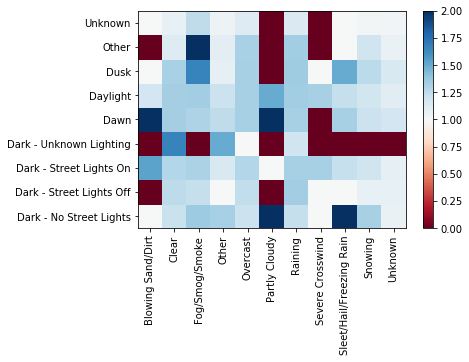

In [11]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [12]:
df_gptest2 = df[['LIGHTCOND','ROADCOND','SEVERITYCODE']]
grouped_test2 = df_gptest2.groupby(['LIGHTCOND','ROADCOND'],as_index= False).mean()
grouped_pivot2 = grouped_test2.pivot(index='LIGHTCOND',columns='ROADCOND')
grouped_pivot2 = grouped_pivot2.fillna(0) #fill missing values with 0

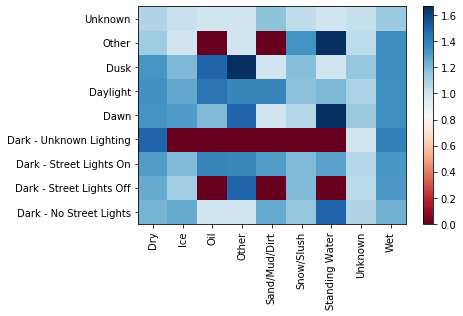

In [13]:
#use the grouped results
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot2, cmap='RdBu')

#label names
row_labels = grouped_pivot2.columns.levels[1]
col_labels = grouped_pivot2.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot2.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot2.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

From those 2 figures of data visualisation that tells combination from visibility, road condition and weather, we can easily know in which particular condition met are probable to have more severe collision.\
As conclusion we can say that Lighting Condition, Road Condition and Weather are also becoming the most predictable variable to severe collision.

**d. Statistical Significant through P-Value**

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

    p-value is < 0.001: we say there is strong evidence that the correlation is significant.
    the p-value is < 0.05: there is moderate evidence that the correlation is significant.
    the p-value is < 0.1: there is weak evidence that the correlation is significant.
    the p-value is > 0.1: there is no evidence that the correlation is significant.



In [14]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['PEDCYLCOUNT'], df['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.21421818271573084  with a P-value of P = 0.0


In [15]:
pearson_coef, p_value = stats.pearsonr(df['PEDCOUNT'], df['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.24633815772799883  with a P-value of P = 0.0


Thus we have strong evidence that the hypothesis of choosing attribute PEDCYLCOUNT and PEDCOUNT are significant to Severity Type occured. This means that bicycle and pedestrian becoming predictor to occuring collision. As an addition, we could not involve speeding in predictor variable since scarcity of data, that the missing data more than 80% out of whole dataset.

Should be noted that we could not applying Pearson Correlation and calculating P-Value for object type, such as UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, then we need to do pre-processing on get dummies for those attributes later in Pre-Processing, then we could figure out this statistical significant evidence. 


## 3. Data Preparation 

In [16]:
df_new = df.copy()

In [17]:
df_new.head(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,2013
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2006
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,2004


**a. Drop unused attributes**

In [18]:
df_new.drop(['X', 'Y', 'OBJECTID', 'INCKEY',
       'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND','PEDROWNOTGRNT', 'SDOTCOLNUM','HITPARKEDCAR','VEHCOUNT','PERSONCOUNT',
       'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'year'], axis=1, inplace = True)

In [19]:
df_new.head(3)

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,0,0,N,Overcast,Wet,Daylight
1,1,0,0,0,Raining,Wet,Dark - Street Lights On
2,1,0,0,0,Overcast,Dry,Daylight


In [20]:
df_new.dtypes

SEVERITYCODE     int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
UNDERINFL       object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

In [21]:
df_new.isnull().sum()

SEVERITYCODE       0
PEDCOUNT           0
PEDCYLCOUNT        0
UNDERINFL       4884
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

**b. Deleting rows for missing data**

Since missing data from attributes UNDERINFL, WEATHER, ROADCOND, LIGHTCOND is not more than 2% of whole datasets then we can go with deleting rows for missing data.

In [22]:
missing_data = df_new.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64



In [23]:
# simply drop whole row with NaN in "WEATHER","UNDERINFL",'ROADCOND','LIGHTCOND' column
df_new.dropna(subset=["WEATHER","UNDERINFL",'ROADCOND','LIGHTCOND'], axis=0, inplace=True)

# reset index, because we droped two rows
df_new.reset_index(drop=True, inplace=True)

In [24]:
df_new.isnull().sum()

SEVERITYCODE    0
PEDCOUNT        0
PEDCYLCOUNT     0
UNDERINFL       0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

In [25]:
missing_data = df_new.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

SEVERITYCODE
False    189337
Name: SEVERITYCODE, dtype: int64

PEDCOUNT
False    189337
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    189337
Name: PEDCYLCOUNT, dtype: int64

UNDERINFL
False    189337
Name: UNDERINFL, dtype: int64

WEATHER
False    189337
Name: WEATHER, dtype: int64

ROADCOND
False    189337
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189337
Name: LIGHTCOND, dtype: int64



Good! We all now have 189.337 rows after deletion rows of missing data. Now let's check data type.

In [26]:
df_new.dtypes

SEVERITYCODE     int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
UNDERINFL       object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

**c. Turn Categorical Variable (object type) into Quantitative Variables**

In [27]:
#GET DUMMIES for object dtypes that have hi correlation to targets 
#'WEATHER','ROADCOND','LIGHTCOND'

dummy_WEATHER = pd.get_dummies(df_new["WEATHER"])
dummy_WEATHER.rename(columns={'Unknown':'Unknown_Weather'}, inplace=True)

# merge data frame "df_new" and "dummy_WEATHER" 
df_new2 = pd.concat([df_new, dummy_WEATHER], axis=1)

# drop original column "WEATHER" from "df_new2"
df_new2.drop("WEATHER", axis = 1, inplace=True)
df_new2.head(3)

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,ROADCOND,LIGHTCOND,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown_Weather
0,2,0,0,N,Wet,Daylight,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,Wet,Dark - Street Lights On,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,Dry,Daylight,0,0,0,0,1,0,0,0,0,0,0


In [28]:
dummy_ROADCOND = pd.get_dummies(df_new2["ROADCOND"])
dummy_ROADCOND.rename(columns={'Other':'Other_Roadcond','Unknown':'Unknown_Roadcond'}, inplace=True)

# merge data frame "df_new2" and "dummy_ROADCOND" 
df_new2 = pd.concat([df_new2, dummy_ROADCOND], axis=1)

# drop original column "ROADCOND" from "df_new2"
df_new2.drop("ROADCOND", axis = 1, inplace=True)

In [29]:
df_new2.head(3)

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,LIGHTCOND,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,...,Unknown_Weather,Dry,Ice,Oil,Other_Roadcond,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown_Roadcond,Wet
0,2,0,0,N,Daylight,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,Dark - Street Lights On,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,Daylight,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [30]:
dummy_LIGHTCOND = pd.get_dummies(df_new2["LIGHTCOND"])
dummy_LIGHTCOND.rename(columns={'Other':'Other_Lightcond','Unknown':'Unknown_Lightcond'}, inplace=True)

# merge data frame "df_new2" and "dummy_LIGHTCOND" 
df_new2 = pd.concat([df_new2, dummy_LIGHTCOND], axis=1)

# drop original column "LIGHTCOND" from "df_new2"
df_new2.drop("LIGHTCOND", axis = 1, inplace=True)
df_new2.head(3)

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other_Lightcond,Unknown_Lightcond
0,2,0,0,N,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
df_new3 = df_new2.copy()

In [32]:
df_new3['UNDERINFL'].value_counts()

N    99863
0    80376
Y     5103
1     3995
Name: UNDERINFL, dtype: int64

In UNDERINFL we need to turn 'N' to 0 and 'Y' to 1. Same with the HITPARKEDCAR.

In [33]:
# replace "N" to '0' and 'Y' to 1 
df_new3['UNDERINFL'].replace("N", 0, inplace = True)
df_new3['UNDERINFL'].replace("Y", 1, inplace = True)
df_new3['UNDERINFL'].replace("0", 0, inplace = True)
df_new3['UNDERINFL'].replace("1", 1, inplace = True)
df_new3['UNDERINFL'].value_counts()
df_new3.head(3)

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other_Lightcond,Unknown_Lightcond
0,2,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
df_new3['UNDERINFL'].value_counts()

0    180239
1      9098
Name: UNDERINFL, dtype: int64

All set! To final check let's see datasets datatype.

In [35]:
df_new3.dtypes

SEVERITYCODE                int64
PEDCOUNT                    int64
PEDCYLCOUNT                 int64
UNDERINFL                   int64
Blowing Sand/Dirt           uint8
Clear                       uint8
Fog/Smog/Smoke              uint8
Other                       uint8
Overcast                    uint8
Partly Cloudy               uint8
Raining                     uint8
Severe Crosswind            uint8
Sleet/Hail/Freezing Rain    uint8
Snowing                     uint8
Unknown_Weather             uint8
Dry                         uint8
Ice                         uint8
Oil                         uint8
Other_Roadcond              uint8
Sand/Mud/Dirt               uint8
Snow/Slush                  uint8
Standing Water              uint8
Unknown_Roadcond            uint8
Wet                         uint8
Dark - No Street Lights     uint8
Dark - Street Lights Off    uint8
Dark - Street Lights On     uint8
Dark - Unknown Lighting     uint8
Dawn                        uint8
Daylight      

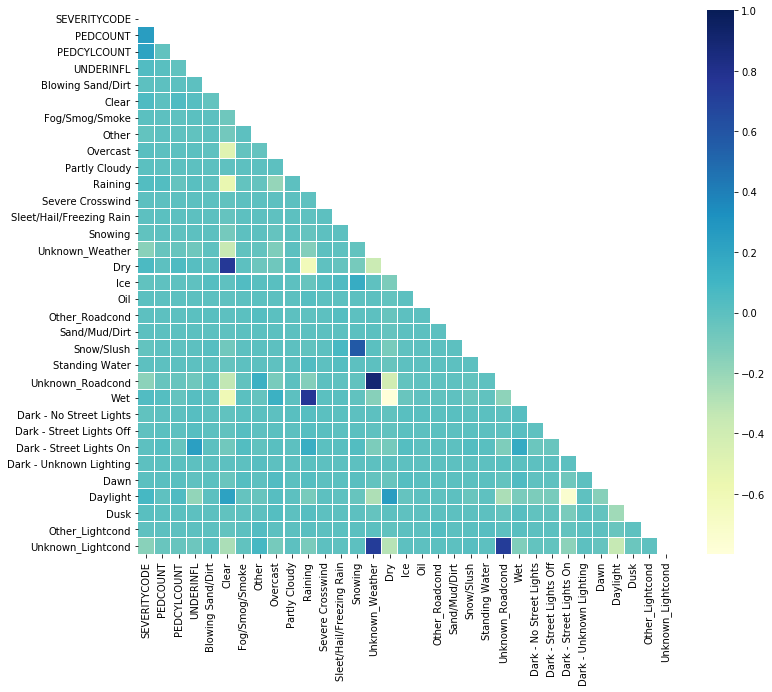

In [36]:
corrmat = df_new3.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))

matrix = np.triu(corrmat)
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1, mask=matrix, annot = False)

GREAT! Now we have strong evidence with a way better predictable variable to collision. Next we would have to do balancing, shuffling and normalization.


In [37]:
pearson_coef, p_value = stats.pearsonr(df_new3['UNDERINFL'], df_new3['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.04362383895953582  with a P-value of P = 2.028229892207751e-80


In [38]:
pearson_coef, p_value = stats.pearsonr(df_new3['PEDCOUNT'], df_new3['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.2480677888591744  with a P-value of P = 0.0


In [39]:
pearson_coef, p_value = stats.pearsonr(df_new3['PEDCYLCOUNT'], df_new3['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.21572465274016708  with a P-value of P = 0.0


In [40]:
df_new3.corr()

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other_Lightcond,Unknown_Lightcond
SEVERITYCODE,1.000000,0.248068,0.215725,0.043624,-0.001062,0.055124,0.003269,-0.023134,0.012968,0.003345,...,0.038631,-0.016499,-0.006284,-0.003830,0.001035,0.007065,0.083926,0.010841,-0.006150,-0.154543
PEDCOUNT,0.248068,1.000000,-0.017886,0.015546,-0.001693,-0.001451,0.001114,-0.002959,-0.000583,-0.000976,...,0.026070,0.002203,0.001856,0.027577,0.005460,0.010294,-0.007962,0.004639,-0.002209,-0.040649
PEDCYLCOUNT,0.215725,-0.017886,1.000000,-0.017486,-0.001101,0.047240,-0.006589,-0.008049,0.000063,-0.000883,...,-0.031947,-0.004070,-0.002254,-0.034708,0.002779,0.010131,0.046703,0.007085,-0.004288,-0.036258
UNDERINFL,0.043624,0.015546,-0.017486,1.000000,-0.002381,0.022105,0.008418,-0.012228,0.003486,-0.001155,...,0.020606,0.019067,0.023017,0.237950,-0.001713,-0.010213,-0.186470,-0.002842,-0.003010,-0.057434
Blowing Sand/Dirt,-0.001062,-0.001693,-0.001101,-0.002381,1.000000,-0.020293,-0.000936,-0.001127,-0.007054,-0.000088,...,-0.004130,0.001915,-0.001357,0.000660,-0.000130,0.003456,-0.004276,0.000517,-0.000601,0.004935
Clear,0.055124,-0.001451,0.047240,0.022105,-0.020293,1.000000,-0.065359,-0.078706,-0.492619,-0.006118,...,-0.599083,-0.012075,-0.015439,-0.072143,-0.004853,-0.041220,0.223626,-0.013635,-0.019427,-0.262081
Fog/Smog/Smoke,0.003269,0.001114,-0.006589,0.008418,-0.000936,-0.065359,1.000000,-0.003630,-0.022719,-0.000282,...,0.004566,0.006872,0.016369,0.031275,-0.000418,0.024066,-0.028892,-0.006502,0.000805,-0.012182
Other,-0.023134,-0.002959,-0.008049,-0.012228,-0.001127,-0.078706,-0.003630,1.000000,-0.027358,-0.000340,...,-0.026178,0.002075,-0.000190,-0.012654,0.020550,-0.002030,-0.033470,-0.001677,0.040968,0.080079
Overcast,0.012968,-0.000583,0.000063,0.003486,-0.007054,-0.492619,-0.022719,-0.027358,1.000000,-0.002127,...,0.131514,-0.000403,0.004485,0.015729,-0.001193,0.037599,0.016684,0.023598,-0.002699,-0.091825
Partly Cloudy,0.003345,-0.000976,-0.000883,-0.001155,-0.000088,-0.006118,-0.000282,-0.000340,-0.002127,1.000000,...,-0.000598,0.010997,-0.000409,-0.000658,-0.000039,0.008406,-0.002248,-0.000921,-0.000181,-0.001421


Should be noted that when p-value is < 0.001 means that both variable are statistically significant and negative correlation means has negative correlation and moderately strong.

Finally we have strong evidence of attributes which become the strongest predictors amongst other variable: 
1. PEDCOUNT
2. PEDCYLCOUNT
3. UNDERINFL
4. WEATHER
5. ROADCOND
6. LIGHTCOND

**d. Balancing through Under Sampling**

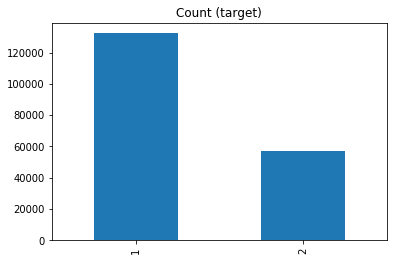

In [41]:
# Class count
count_class_1, count_class_2 = df_new3['SEVERITYCODE'].value_counts()

# Divide by class
df_class_1 = df_new3[df_new3['SEVERITYCODE'] == 1]
df_class_2 = df_new3[df_new3['SEVERITYCODE'] == 2]

df_new3['SEVERITYCODE'].value_counts().plot(kind='bar', title='Count (target)')

Random under-sampling:
2    57052
1    57052
Name: SEVERITYCODE, dtype: int64


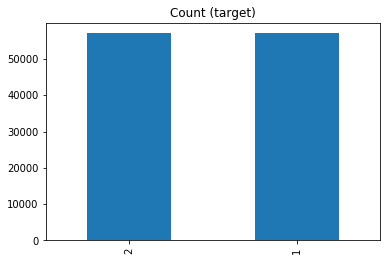

In [42]:
df_class_1_under = df_class_1.sample(count_class_2)
df_test_under = pd.concat([df_class_1_under, df_class_2], axis=0)

print('Random under-sampling:')
print(df_test_under['SEVERITYCODE'].value_counts())

df_test_under['SEVERITYCODE'].value_counts().plot(kind='bar', title='Count (target)')

In [43]:
df_test_under.to_csv('balanced_data.csv')

In [44]:
df_new4 = pd.read_csv('balanced_data.csv')

In [45]:
df_new4.head(3)

,Unnamed: 0,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other_Lightcond,Unknown_Lightcond
0,187566,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,74104,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,127794,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
df_new4.drop(['Unnamed: 0'], axis=1, inplace = True)

In [72]:
df_new4.head(3)

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other_Lightcond,Unknown_Lightcond
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**e. Shuffling The Dataset**

We can see from dataset after under sampling above that the first 50% of whole dataset are having same target which is '1'. Hence to train dataset better, would be great if we can do shuffling before splitting the dataset into train and test data. 

In [48]:
#Shuffle the data before splitting into training and testing dataset
df_shuffled_balanced = df_new4.sample(frac=1).reset_index(drop=True)

In [71]:
df_shuffled_balanced.head(3)

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other_Lightcond,Unknown_Lightcond
0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
df_shuffled_balanced.columns

Index(['SEVERITYCODE', 'PEDCOUNT', 'PEDCYLCOUNT', 'UNDERINFL',
       'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Other', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Unknown_Weather', 'Dry', 'Ice',
       'Oil', 'Other_Roadcond', 'Sand/Mud/Dirt', 'Snow/Slush',
       'Standing Water', 'Unknown_Roadcond', 'Wet', 'Dark - No Street Lights',
       'Dark - Street Lights Off', 'Dark - Street Lights On',
       'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk',
       'Other_Lightcond', 'Unknown_Lightcond'],
      dtype='object')

**f. Initialization**

In [51]:
X = np.asarray(df_shuffled_balanced[['PEDCOUNT', 'PEDCYLCOUNT', 'UNDERINFL',
       'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Other', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Unknown_Weather', 'Dry', 'Ice',
       'Oil', 'Other_Roadcond', 'Sand/Mud/Dirt', 'Snow/Slush',
       'Standing Water', 'Unknown_Roadcond', 'Wet', 'Dark - No Street Lights',
       'Dark - Street Lights Off', 'Dark - Street Lights On',
       'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk',
       'Other_Lightcond', 'Unknown_Lightcond']])

In [52]:
X[0:5]

array([[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [53]:
y = np.asarray(df_shuffled_balanced[['SEVERITYCODE']])

In [54]:
y[0:5]

array([[1],
       [2],
       [2],
       [2],
       [2]])

**g. Normalization**

In [55]:
from sklearn import preprocessing

In [56]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [57]:
X[0:5]

array([[-0.24011942, -0.21517696,  4.26876703, -0.01674887,  0.81888989,
        -0.05625835, -0.06041779, -0.41767594, -0.00512762, -0.46837217,
        -0.01146631, -0.0227451 , -0.06451819, -0.25502711,  0.70193076,
        -0.0774287 , -0.01872646, -0.02632167, -0.02196017, -0.0684416 ,
        -0.02293715, -0.25461757, -0.58738978, -0.08642726, -0.07879158,
         1.70754714, -0.00783271, -0.1165807 , -1.30623851, -0.1800792 ,
        -0.03441704, -0.2400523 ],
       [-0.24011942, -0.21517696, -0.23425968, -0.01674887, -1.2211654 ,
        -0.05625835, -0.06041779,  2.39420062, -0.00512762, -0.46837217,
        -0.01146631, -0.0227451 , -0.06451819, -0.25502711, -1.42464194,
        -0.0774287 , -0.01872646, -0.02632167, -0.02196017, -0.0684416 ,
        -0.02293715, -0.25461757,  1.70244704, -0.08642726, -0.07879158,
        -0.58563537, -0.00783271, -0.1165807 ,  0.76555697, -0.1800792 ,
        -0.03441704, -0.2400523 ],
       [-0.24011942, -0.21517696, -0.23425968, -0.0167

### 3. METHODOLOGY 

Classification method used are KNN, Logistic Regression, SVM Classification

In [58]:
#Splitting dataset into 80% training set and 20% test set

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (91283, 32) (91283, 1)
Test set: (22821, 32) (22821, 1)


**KNN CLASSIFICATION**

In [59]:
from sklearn.neighbors import KNeighborsClassifier

k = 17
#Train model
KNN_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN_model

#predict 
yhat = KNN_model.predict(X_test)
yhat[0:5]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


array([2, 2, 2, 1, 2])

In [ ]:
#Code below is to know best K number to optimalize KNN Classification

Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    KNN_model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=KNN_model.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc[0:5]

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

**LOGISTIC REGRESSION**

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_LR = LR.predict(X_test)

LR_yhat_prob = LR.predict_proba(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**SVM Classification**

In [66]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 
yhat_SVM = SVM_model.predict(X_test)
yhat_SVM

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 1, 1, ..., 1, 2, 1])

## 4. Model Evaluation

In [62]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [63]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

Train set Accuracy:  0.5840079751980106
Test set Accuracy:  0.5819639805442356
KNN Jaccard index: 0.58
KNN F1-score: 0.58


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [65]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))

print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_LR))
print("LR F1-score: %.2f" % f1_score(y_test, yhat_LR, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

Train set Accuracy:  0.5998159569689866
Test set Accuracy:  0.6029972393847772
LR Jaccard index: 0.60
LR F1-score: 0.58
LR LogLoss: 0.62


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [67]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, SVM_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_SVM))

print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_SVM))
print("SVM F1-score: %.2f" % f1_score(y_test, yhat_SVM, average='weighted') )

Train set Accuracy:  0.6018754861255655
Test set Accuracy:  0.6020770343105035
SVM Jaccard index: 0.60
SVM F1-score: 0.58


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## 5. Result 

Final result of 3 (three) different Classification of Machine Learning Algorithm used, we have evaluation model as can be seen below : 

| Algorithm          | Accuracy| Jaccard  |F1 Score |LogLoss |
|--------------------|---------|----------|---------|--------|
| KNN                | 0.58    | 0.58     | 0.58    | N/A    |
| Logistic Regression| 0.60    | 0.60     | 0.58    | 0.62   |
| SVM                | 0.60    | 0.60     | 0.58    | N/A    |



Logistic Regression has the highest accuracy amongst others methods since it is suited best for binary classification. SVM also took same accuracy, Jaccard Index and F1 Score with Logistic Regression, considering  it uses a technique called the kernel trick to transform data and then based on these transformations it finds an optimal boundary between the possible outputs, thus it can capture much more complex relationships between datapoints without performing difficult transformations.

## 6. Discussion

There are numerous fascinating insights have been obtained after wrenching the data:
1. Not only weather, road condition, and lighting condition becoming predictor to severe collision, but also drug influence of driver, existence of pedestrian and bicyles on the road (eventhough it's a minor correlation our of whole number of collision), this is evidenced by result of Pearson Correlation and Statistical Significant of p-value.

2. As mentioned by World Heatlh Organization, vehicle's speed considered as a key  risk factor in road traffic injuries.  An increase in average speed of 1 km/h typically results in a 3% higher risk of a crash involving injury, with a 4–5% increase for crashes that result in fatalities. It is unfortunate the dataset could not reveal vehicle's speed with considerable number of cases due to its data scarcity. We suggest to the Government to enhance the dataset quantity especially with vehicle speeding, by improving data retrieval method of vehicle speed (one of example using computer vision technology to capture real time speed). 

3. Shuffling is needed in data preparation, as a cause of data biased after balancing the dataset. Shuffle will ensure that each data point creates an "independent" change on the model, without being biased by the same points before them.

## 7. Conclusion